# Cycle-by-cycle features of oscillatory waveforms
In this notebook, we use neurodsp to break a neural signal into individual cycles of an oscillation of interest. For each cycle, we compute some features of its waveform.

In [1]:
import numpy as np
from neurodsp import shape

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt

### Load neural signal

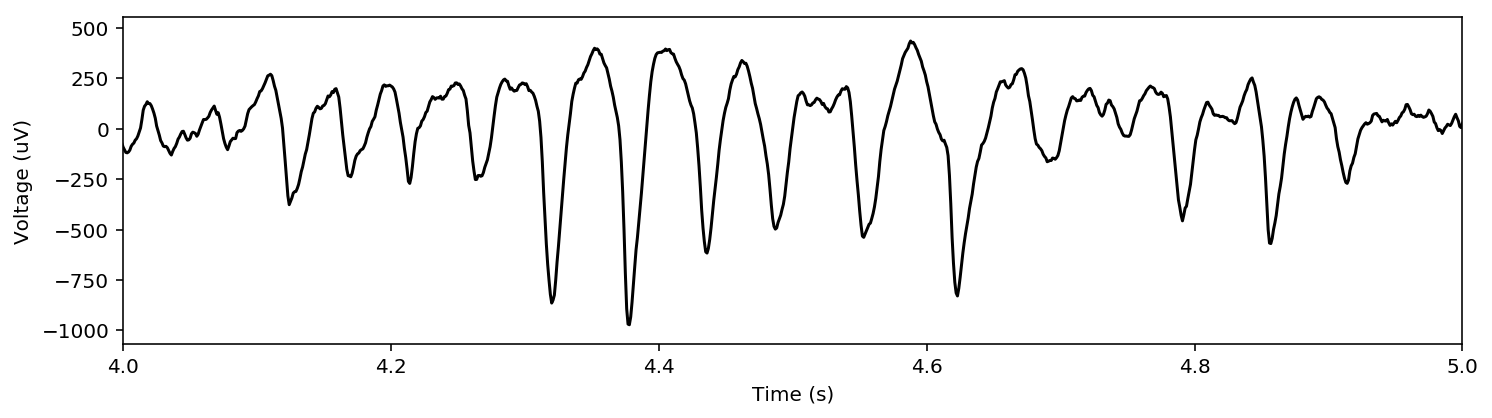

In [2]:
# Load signal
x = np.load('./data/sample_data_1.npy')
Fs = 1000.
t = np.arange(0, len(x)/Fs, 1/Fs)
f_range = (13,30)

# Plot example signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k')
plt.xlim((4,5))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')

In [5]:
len(x)

10000

# Compute features of each cycle

In [3]:
df = shape.features_by_cycle(x, Fs, f_range, center_extrema='T')
df.head()

oscillator_amplitude  period  sample_last_peak  sample_next_peak  \
0             27.442521      46               128               174   
1             34.980215      48               174               222   
2             19.290058      40               222               262   
3             18.898692      53               262               315   
4             20.070945      29               315               344   

   sample_trough  sample_zerox_rise  sample_zerox_decay  time_rise  \
0            148                157                 139         26   
1            185                197                 178         37   
2            231                250                 226         31   
3            308                311                 280          7   
4            328                334                 324         16   

   time_trough  time_ptsym  time_rdsym  time_decay  time_peak   volt_rise  \
0           18    0.550000    0.565217          20         22   77.542938   
1           19    0.525000    0.770833          11         21  123.623268   
2           24    0.547170    0.775000           9         29  161.573095   
3           31    0.491803    0.132075          46         30  113.252293   
4           10    0.565217    0.551724          13         13  140.175399   

   volt_trough  volt_ptsym  volt_rdsym  volt_decay   volt_peak  
0   -18.474257 -127.051091  -49.508153  127.051091  108.576834  
1   -84.545266 -143.613947  -19.990679  143.613947   59.068681  
2   -87.419348 -126.497350   35.075745  126.497350   39.078002  
3    15.490505  -58.663243   54.589050   58.663243   74.153747  
4    31.155748  -97.587049   42.588350   97.587049  128.742797

In [6]:
df.describe()

oscillator_amplitude      period  sample_last_peak  sample_next_peak  \
count            200.000000  200.000000        200.000000        200.000000   
mean             122.881514   48.950000       4829.485000       4878.435000   
std              110.571618   12.049208       2839.168165       2842.095714   
min                8.741315   23.000000        128.000000        174.000000   
25%               35.917824   40.000000       2351.500000       2412.750000   
50%               75.901082   49.500000       4868.000000       4914.500000   
75%              184.361733   56.000000       7246.750000       7296.500000   
max              497.090138   83.000000       9873.000000       9918.000000   

       sample_trough  sample_zerox_rise  sample_zerox_decay   time_rise  \
count     200.000000         200.000000          200.000000  200.000000   
mean     4851.095000        4862.475000         4840.615000   27.340000   
std      2840.848123        2840.527525         2840.504958   10.092258   
min       148.000000         157.000000          139.000000    6.000000   
25%      2369.000000        2386.500000         2359.000000   19.000000   
50%      4885.500000        4892.500000         4879.000000   27.000000   
75%      7276.750000        7289.500000         7258.500000   33.000000   
max      9891.000000        9907.000000         9884.000000   53.000000   

       time_trough  time_ptsym  time_rdsym  time_decay   time_peak  \
count   200.000000  200.000000  200.000000  200.000000  200.000000   
mean     21.860000    0.545607    0.559121   21.610000   27.090000   
std       7.546199    0.125885    0.155944    9.467103   10.175441   
min       7.000000    0.279070    0.132075    1.000000   10.000000   
25%      17.000000    0.449342    0.459001   15.000000   19.000000   
50%      20.000000    0.543798    0.568627   19.500000   26.000000   
75%      25.000000    0.652396    0.679615   27.000000   34.000000   
max      51.000000    0.800000    0.964286   49.000000   57.000000   

         volt_rise  volt_trough   volt_ptsym  volt_rdsym   volt_decay  \
count   200.000000   200.000000   200.000000  200.000000   200.000000   
mean    344.265985  -192.457057  -344.402220   -0.136235   344.402220   
std     300.646136   217.805923   297.465899   94.361627   297.465899   
min      43.154566  -991.774538 -1370.768104 -338.174130    -7.928886   
25%     130.807754  -252.060103  -458.140944  -53.619368   135.542430   
50%     230.970168  -110.013371  -225.746943    3.600045   225.746943   
75%     446.219027   -50.211264  -135.542430   56.540541   458.140944   
max    1469.962487    55.606115     7.928886  340.418104  1370.768104   

        volt_peak  
count  200.000000  
mean   151.945163  
std    103.869390  
min    -22.697143  
25%     76.235150  
50%    133.428672  
75%    212.326788  
max    478.187949

# Visualize features for each cycle

In [9]:
# Limit dataframe to only features of interest for part of the signal
tlim = (3,4)
df_1sec = df.loc[(df['sample_trough'] > tlim[0]*Fs) & (df['sample_trough'] < tlim[1]*Fs)]

In [10]:
def plot_feature_at_trough(df, x, t, tlim, feature, plot_title,
                           mark_troughs=False, mark_peaks=False,
                           mark_zeroxR=False, mark_zeroxD=False):
    samps = np.argwhere(np.logical_and(t>=tlim[0], t<tlim[1]))
    plt.figure(figsize=(16,3))
    plt.plot(t[samps], x[samps],'k')
    if mark_troughs:
        plt.plot(t[df['sample_trough'].values], x[df['sample_trough'].values], 'bo')
    if mark_peaks:
        plt.plot(t[df['sample_next_peak'].values], x[df['sample_next_peak'].values], 'ro')
    if mark_zeroxR:
        plt.plot(t[df['sample_zerox_rise'].values], x[df['sample_zerox_rise'].values], 'go')
    if mark_zeroxD:
        plt.plot(t[df['sample_zerox_decay'].values], x[df['sample_zerox_decay'].values], 'mo')
    plt.xlim(tlim)

    ax = plt.gca()
    for i in range(len(df_1sec)):
        trough_sample = df['sample_trough'].values[i]
        label = df[feature].values[i]
        if type(label) is np.bool_:
            label_str = str(label)[0]
        elif abs(label) < 1:
            label_str = str(np.round(label,2))
        else:
            label_str = str(int(label))
        ax.text(t[trough_sample]-.01, x[trough_sample]-150, label_str, fontsize=15)
    plt.ylim((-1000,400))
    plt.xlabel('Time (s)', size=20)
    plt.ylabel('Voltage (uV)', size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title(plot_title, size=20)

### Oscillator amplitude

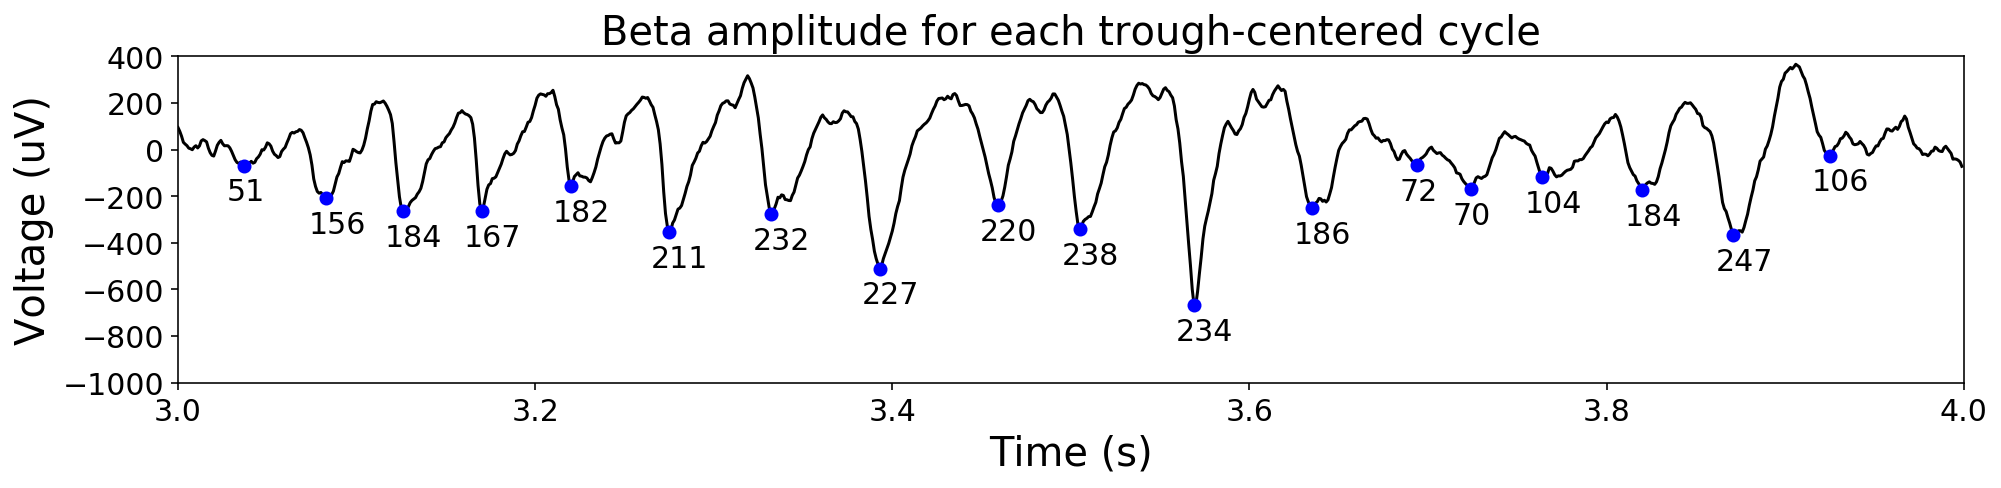

In [11]:
plot_feature_at_trough(df_1sec, x, t, tlim,
                       'oscillator_amplitude', 'Beta amplitude for each trough-centered cycle',
                       mark_troughs=True)

### Trough duration

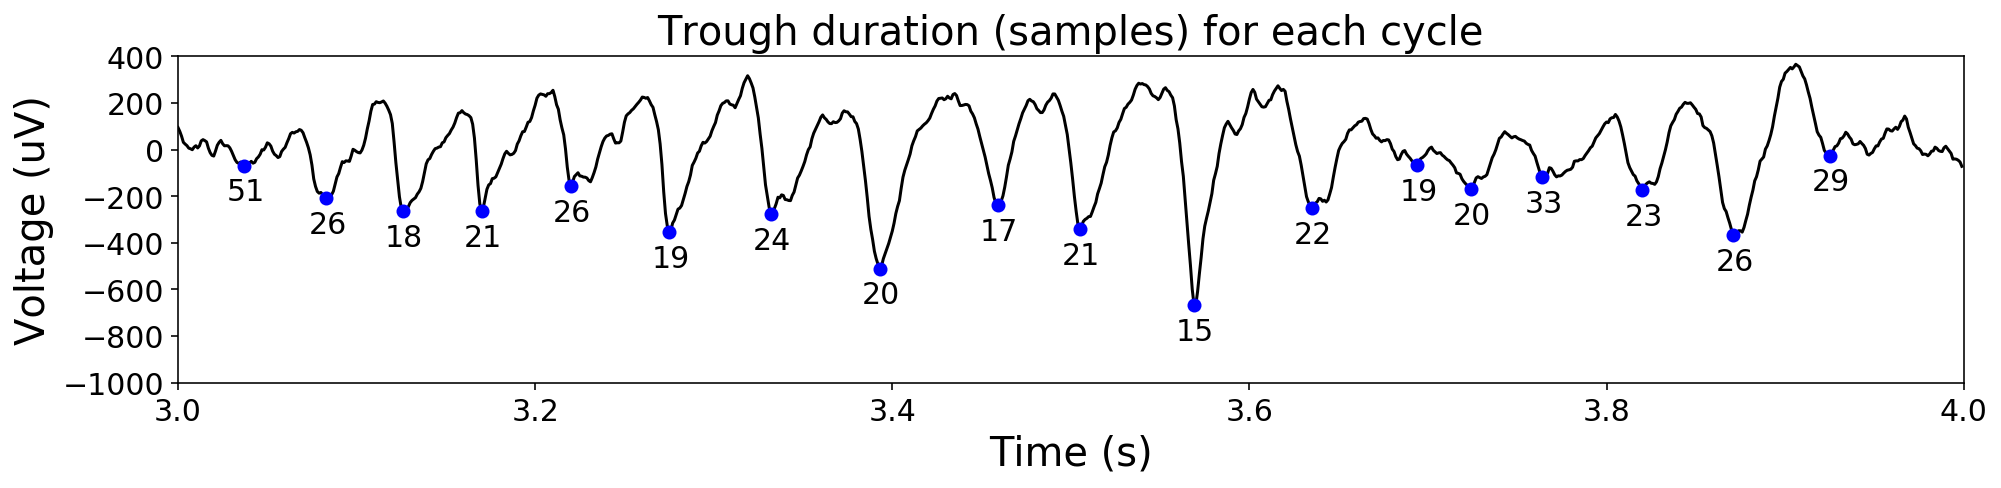

In [12]:
plot_feature_at_trough(df_1sec, x, t, tlim,
                       'time_trough', 'Trough duration (samples) for each cycle',
                       mark_troughs=True)

### Rise-decay asymmetry in time

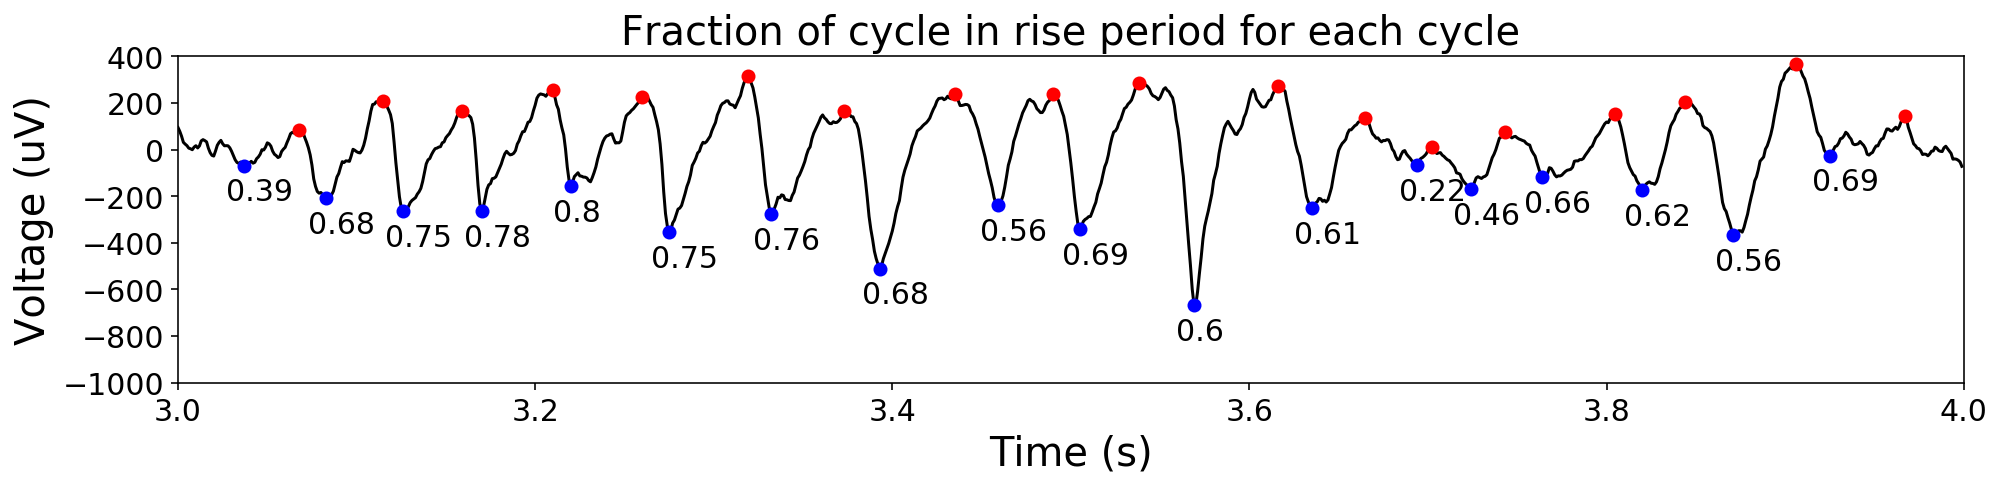

In [13]:
plot_feature_at_trough(df_1sec, x, t, tlim,
                       'time_rdsym', 'Fraction of cycle in rise period for each cycle',
                       mark_troughs=True, mark_peaks=True)

### Rise-decay asymmetry in voltage

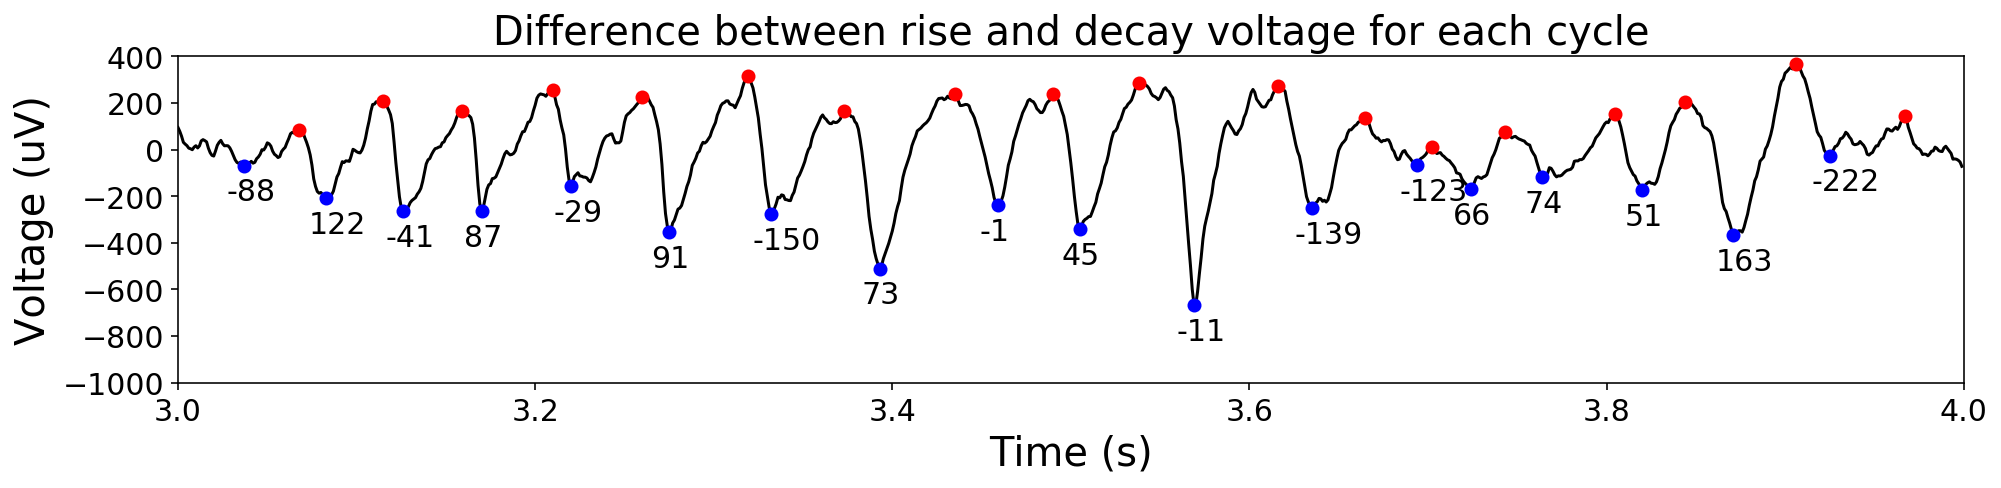

In [11]:
plot_feature_at_trough(df_1sec, x, t, tlim,
                       'volt_rdsym', 'Difference between rise and decay voltage for each cycle',
                       mark_troughs=True, mark_peaks=True)

# Define oscillatory periods by amplitude

In [16]:
true_oscillating_periods_kwargs = {'restrict_by_amplitude_consistency':False,
                                   'restrict_by_period_consistency':False,
                                   'amplitude_fraction_threshold':.3}

df = shape.features_by_cycle(x, Fs, f_range, center_extrema='T',
                             estimate_oscillating_periods=True,
                             true_oscillating_periods_kwargs=true_oscillating_periods_kwargs)

In [17]:
df.head(3)

oscillator_amplitude  period  sample_last_peak  sample_next_peak  \
0             27.442521      46               128               174   
1             34.980215      48               174               222   
2             19.290058      40               222               262   

   sample_trough  sample_zerox_rise  sample_zerox_decay  time_rise  \
0            148                157                 139         26   
1            185                197                 178         37   
2            231                250                 226         31   

   time_trough  time_ptsym  time_rdsym  time_decay  time_peak   volt_rise  \
0           18     0.55000    0.565217          20         22   77.542938   
1           19     0.52500    0.770833          11         21  123.623268   
2           24     0.54717    0.775000           9         29  161.573095   

   volt_trough  volt_ptsym  volt_rdsym  volt_decay   volt_peak  oscillating  
0   -18.474257 -127.051091  -49.508153  127.051091  108.576834        False  
1   -84.545266 -143.613947  -19.990679  143.613947   59.068681        False  
2   -87.419348 -126.497350   35.075745  126.497350   39.078002        False

### Visualize which periods are in an oscillation

In [18]:
# Limit dataframe to only features of interest for part of the signal
tlim = (3,4)
df_1sec = df.loc[(df['sample_trough'] > tlim[0]*Fs) & (df['sample_trough'] < tlim[1]*Fs)]

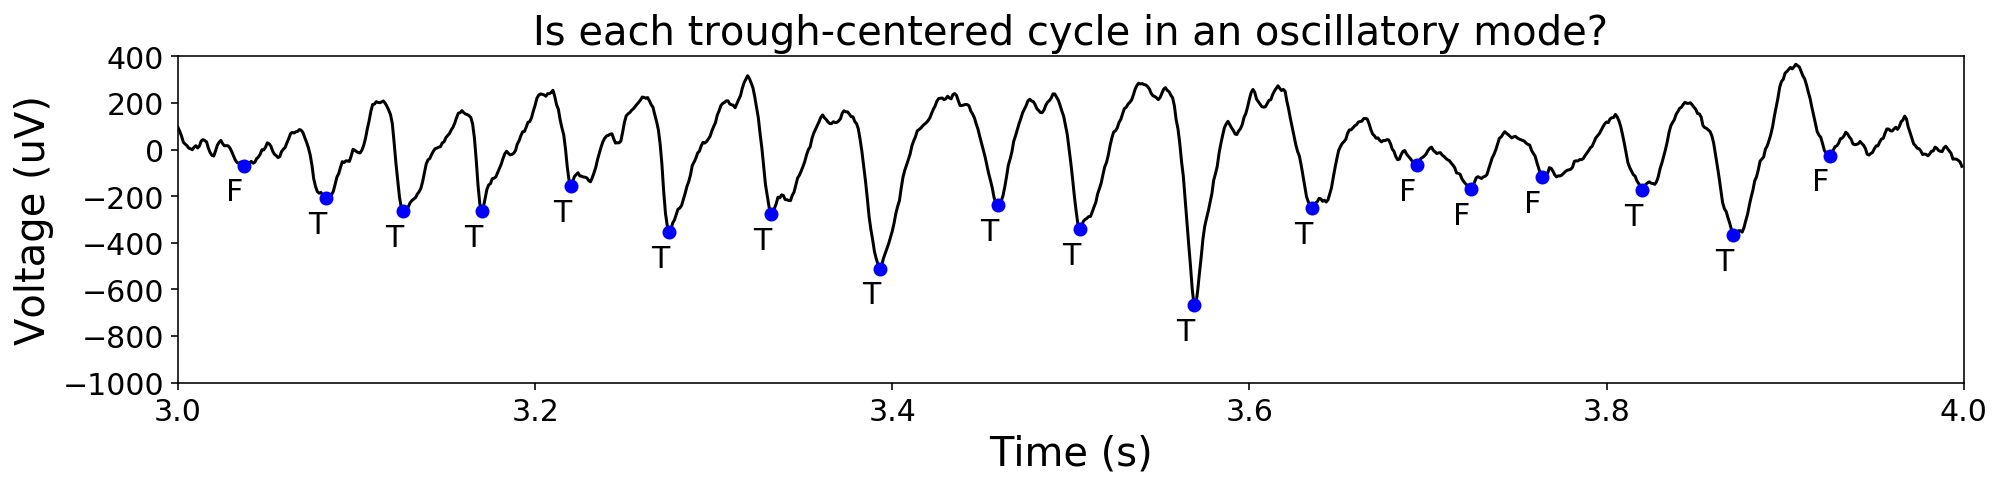

In [19]:
plot_feature_at_trough(df_1sec, x, t, tlim,
                       'oscillating', 'Is each trough-centered cycle in an oscillatory mode?',
                       mark_troughs=True)